## Structure unionize description

Expression statistics for a structure in a section_data_set. These values have been generated by the informatics data processing pipeline. See pipeline overview for more details.

**Attributes**:

sum_pixels (Float) — sum of image pixels spanned by the structure

sum_expressing_pixels (Float) — sum of expressing pixels spanned by the structure

sum_pixel_intensity (Float) — sum of image intensity in pixels spanned by the structure

sum_expressing_pixel_intensity (Float) — sum of image intensity in expression pixels only within the structure

expression_density (Float) — sum of expressing pixels / sum of all pixels

expression_intensity (Float) — sum of expressing pixel intensity / sum of expressing pixels

expression_energy (Float) — expression intensity * expression density

voxel_energy_mean (Float) — mean expression energy over all voxels spanned by the structure

voxel_energy_cv (Float) — coefficient of variation (variance/mean) of expression energy over all voxels spanned by the 
structure. The statistic can be use as a measure of dispersion

**Associations**:

section_data_set (SectionDataSet) — the section_data_set over which the expression statistics was computed

structure (Structure) — the structure over with the expression statistics was computed

In [186]:
ga[45]

{'age': 'P56',
 'donor_id': 6713,
 'expression_energy': 0.0209221,
 'gene': 'Adora2a',
 'level_st': 'None',
 'plane': 1,
 'structure_acronym': 'SPVOrdm',
 'structure_id': 45,
 'sum_expressing_pixel_intensity': 11706.0,
 'sum_expressing_pixels': 86.583,
 'sum_pixels': 559504.0,
 'voxel_energy_cv': 1.29985,
 'voxel_energy_mean': 0.020922}

In [187]:
ga[45]['sum_expressing_pixel_intensity'] / ga[45]['sum_pixels']

0.02092210243358403

In [72]:
import numpy as np
from brainmap import AllenBrainReference, AllenVolumetricData
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [2]:
root_folder = '/home/gioele/IPyNotebook/AllenBrainFiles/'
filename = 'table_Adora2a.txt'

In [69]:
ABR = AllenBrainReference("adult")

In [87]:
gene_grid = AllenVolumetricData("../data/Adora2a_P56_coronal_72109410_200um.zip")
reference_grid = AllenVolumetricData("../data/AllenBrain3d/P56_Mouse_gridAnnotation.zip", ABR)
reference_areas = AllenVolumetricData("../data/AllenBrain3d/P56_Mouse_annotation.zip", ABR)

In [91]:
reference_areas.shape[2] / reference_grid.shape[2]

7.862068965517241

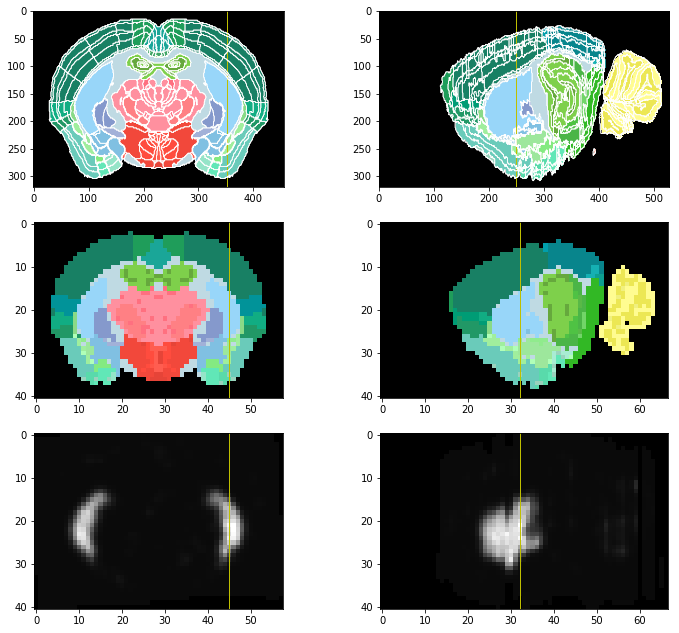

In [93]:
plt.figure(figsize=(12,11))
gs = plt.GridSpec(3,2)
reference_areas.colored.plot_slides(int(32*7.8),int(45*7.8), ss=gs[0,:], contour=True)
reference_grid.plot_slides(32,45, ss=gs[1,:])
gene_grid.plot_slides(32,45, ss=gs[2,:])

In [290]:
A = np.copy(reference_areas[int(32*7.8),:,:]) #32
B = np.zeros_like(A)

In [291]:
labels = np.array(reference_areas.ids)

In [292]:
labels_ix_used = np.unique(A)
labels_used = labels[labels_ix_used]

In [293]:
for ix in labels_ix_used:
    if labels[ix] == 0:
        continue
    try:
        B[A==ix] = ga[labels[ix]]['expression_energy']
    except KeyError:
        # B[A==ix] = -10000
        print(ABR[ix].name)

Cortical amygdalar area, posterior part, medial zone, layer 2
Substantia nigra, reticular part
Tuberomammillary nucleus


In [295]:
from skimage import transform

In [299]:
c = np.copy(gene_grid[32,:,:])
minus_one = gene_grid[32,:,:] == -1

In [300]:
c[minus_one] = np.min(c[~minus_one])
c = c/ c.max()

In [297]:
np.min(gene_grid[32,:,:]), np.max(gene_grid[32,:,:])

(-1.0, 23.925198)

In [302]:
C = transform.resize(c, B.shape, mode="reflect")

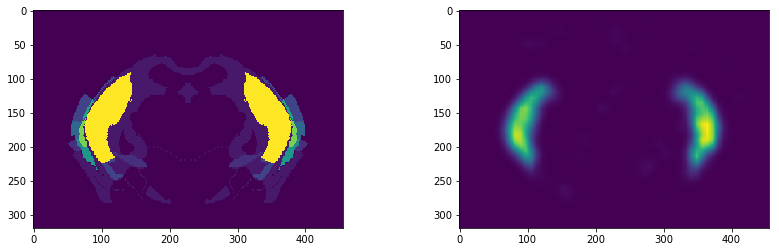

In [305]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.imshow(B)
plt.subplot(122)
plt.imshow(C, interpolation="none")

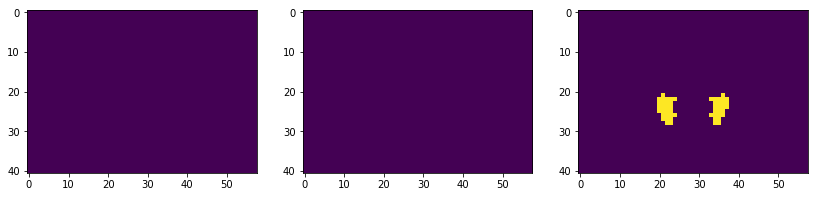

In [241]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(labels[A] == 191)
plt.subplot(132)
plt.imshow(labels[A] == 199)
plt.subplot(133)
plt.imshow((labels[A] == 175).astype(int) + (labels[A] == 159).astype(int) + (labels[A] == 183).astype(int))

In [240]:
np.unique((labels[A] == 175).astype(int) + (labels[A] == 159).astype(int) + (labels[A] == 183).astype(int))

array([0, 1])

In [208]:
for label in labels_used:
    if label == 0:
        continue
    if ABR[label].children:
        print(ABR[label].name, ABR[label].id, ABR[label].id in labels_used)
        for i in ABR[label].children:
            print('\t%s %s %s' % (i.name, i.id, i.id in labels_used))

Basic cell groups and regions 8 True
	Brain stem 343 False
	Cerebellum 512 True
	Cerebrum 567 False
Superior colliculus, motor related, intermediate gray layer 10 True
	Superior colliculus, motor related, intermediate gray layer, sublayer a 494 True
	Superior colliculus, motor related, intermediate gray layer, sublayer b 503 True
	Superior colliculus, motor related, intermediate gray layer, sublayer c 511 True
Midbrain reticular nucleus 128 True
	Midbrain reticular nucleus, magnocellular part, general 548 False
	Midbrain reticular nucleus, parvicellular part 555 False
	Midbrain reticular nucleus, magnocellular part 539 False
Nucleus ambiguus 135 True
	Nucleus ambiguus, ventral division 143 True
	Nucleus ambiguus, dorsal division 939 True
Accessory olfactory bulb 151 True
	Accessory olfactory bulb, glomerular layer 188 True
	Accessory olfactory bulb, granular layer 196 True
	Accessory olfactory bulb, mitral layer 204 True
Anterior olfactory nucleus 159 True
	Anterior olfactory nucleus, 

In [132]:
for label in labels_used:
    ga[label]

array([    0,     8,     9,    59,    87,   110,   118,   120,   131,
         149,   155,   163,   173,   181,   186,   189,   192,   194,
         200,   201,   255,   260,   262,   268,   276,   278,   284,
         291,   292,   303,   314,   327,   330,   334,   342,   344,
         347,   366,   408,   411,   416,   424,   430,   434,   438,
         442,   446,   454,   455,   461,   479,   483,   486,   495,
         504,   520,   542,   544,   549,   551,   559,   575,   583,
         590,   598,   599,   606,   610,   617,   626,   629,   632,
         636,   648,   656,   670,   672,   685,   687,   688,   698,
         700,   718,   724,   733,   755,   767,   797,   806,   844,
         857,   862,   873,   882,   893,   897,   907,   943,   952,
         959,   962,   966,   981,   990,  1006,  1021,  1022,  1023,
        1031,  1035,  1038,  1047,  1058,  1062,  1070,  1086,  1090,
        1096,  1097,  1104,  1105,  1106,  1111, 10703], dtype=uint32)

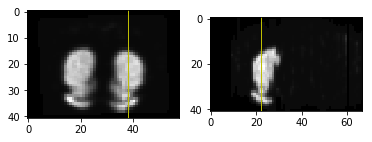

In [68]:
gene_grid.plot_slides(22,38)

In [133]:
import re

In [134]:
regex = re.compile("P56")

In [140]:
if regex.match("Pas56"):
    print("a")

In [168]:
def quick_caster(val):
    try:
        return int(val)
    except ValueError:
        try:
            return float(val)
        except ValueError:
            return val

class GeneExpression:
    def __init__(self, filepath, age=None, plane=None, struct_atlas=None):
        if age:
            regex = re.compile(age)
            age_check = regex.match
        else:
            age_check = lambda x: True
        if plane:
            plane_check = lambda x: int(x)==int(plane)
        else:
            plane_check = lambda x: True
        if struct_atlas == "adult":
            struct_atlas_check = lambda x: x=='None'
        elif struct_atlas == "development":
            struct_atlas_check = lambda x: x!='None'
        else:
            struct_atlas_check = lambda x: True
            
        with open(filepath) as fin:
            headers, *lines = fin.read().rstrip().split("\n")
        headers = headers.split('\t')
        self._entries = {}
        tmp = []
        for line in lines:
            tln = line.split("\t")
            if age_check(tln[1]) and plane_check(tln[4]) and struct_atlas_check(tln[-1]):
                tmp.append(tln)
        assert len(tmp) == len(set([i[2] for i in tmp]))
        self._entries = {int(i[3]):dict(zip(headers, map(quick_caster, i))) for i in tmp}
        
    def __getitem__(self, value):
        return self._entries[value]
    
    def __contains__(self, value):
        return value in self._entries

In [169]:
ga = GeneExpression("/home/gioele/IPyNotebook/AllenBrainFiles/table_Adora2a.txt", age="P56", plane=1, struct_atlas="adult")

In [173]:
ga[1]['sum_expressing_pixel_intensity'] / ga[1]['sum_pixels']

0.134584509545189

In [162]:
ga[1][]

{'age': 'P56',
 'donor_id': '6713',
 'expression_energy': '5.70545000',
 'gene': 'Adora2a',
 'level_st': 'None',
 'plane': '1',
 'structure_acronym': 'SSp-m6b',
 'structure_id': '2',
 'sum_expressing_pixel_intensity': '2793190.00000000',
 'sum_expressing_pixels': '15792.100',
 'sum_pixels': '489566.0',
 'voxel_energy_cv': '0.586179',
 'voxel_energy_mean': '5.705450'}

In [7]:
np.prod([67,41,58]) / 2

79663.0

In [115]:
with open(root_folder+filename) as fin:
    headers, *lines = fin.read().rstrip().split("\n")

In [116]:
headers = headers.split('\t')

In [117]:
headers

['gene',
 'age',
 'structure_acronym',
 'structure_id',
 'plane',
 'donor_id',
 'expression_energy',
 'sum_expressing_pixel_intensity',
 'sum_expressing_pixels',
 'sum_pixels',
 'voxel_energy_mean',
 'voxel_energy_cv',
 'level_st']

In [118]:
lines= [line.split("\t") for line in lines if "P56" in line]

In [119]:
lines = [line for line in lines if line[4] == "1"]

In [120]:
lines = [line for line in lines if line[-1] == 'None']

In [121]:
len(lines)

842

In [141]:
len(set([i[3] for i in lines]))

842

In [123]:
ABR[19]

,Induseum griseum
acronym,IG
name,Induseum griseum
id,19
graph_order,491
st_level,None
depth,7
structure_id_path,/997/8/567/688/695/1089/1080/19/
color,7ED04B


In [32]:
lines[0][4]

'2'